![image info](https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/images/banner_1.png)

# Taller: Construcción e implementación de árboles de decisión y métodos de ensamblaje

En este taller podrá poner en práctica los sus conocimientos sobre construcción e implementación de árboles de decisión y métodos de ensamblajes. El taller está constituido por 9 puntos, 5 relacionados con árboles de decisión (parte A) y 4 con métodos de ensamblaje (parte B).

## Parte A - Árboles de decisión

En esta parte del taller se usará el conjunto de datos de Capital Bikeshare de Kaggle, donde cada observación representa el alquiler de bicicletas durante una hora y día determinado. Para más detalles puede visitar los siguientes enlaces: [datos](https://archive.ics.uci.edu/ml/machine-learning-databases/00275/Bike-Sharing-Dataset.zip), [dicccionario de datos](https://archive.ics.uci.edu/ml/datasets/Bike+Sharing+Dataset#).

### Datos prestamo de bicicletas

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importación de librerías
%matplotlib inline
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor, export_graphviz

In [4]:
# Lectura de la información de archivo .csv
bikes = pd.read_csv('bikeshare.csv', index_col='datetime', parse_dates=True)

# Renombrar variable "count" a "total"
bikes.rename(columns={'count':'total'}, inplace=True)

# Crear la hora como una variable 
bikes['hour'] = bikes.index.hour

# Visualización de los datos
bikes.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,total,hour
datetime,,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,0
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,3
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,4


### Punto 1 - Análisis descriptivo

Ejecute las celdas 1.1 y 1.2. A partir de los resultados realice un análisis descriptivo sobre las variables "season" y "hour", escriba sus inferencias sobre los datos. Para complementar su análisis puede usar métricas como máximo, mínimo, percentiles entre otros.

In [29]:
# Celda 1.1
print(bikes.groupby('season').total.mean())
print(f'Cantidad al año: {(bikes.groupby('season').total.mean()).sum()}')

season
1    116.343261
2    215.251372
3    234.417124
4    198.988296
Name: total, dtype: float64
Cantidad al año: 765.0000530509168


In [26]:
# Celda 1.2
print(bikes.groupby('hour').total.mean())
print(f'Promedio al día: {(bikes.groupby('hour').total.mean()).mean()}')

hour
0      55.138462
1      33.859031
2      22.899554
3      11.757506
4       6.407240
5      19.767699
6      76.259341
7     213.116484
8     362.769231
9     221.780220
10    175.092308
11    210.674725
12    256.508772
13    257.787281
14    243.442982
15    254.298246
16    316.372807
17    468.765351
18    430.859649
19    315.278509
20    228.517544
21    173.370614
22    133.576754
23     89.508772
Name: total, dtype: float64
Promedio al día: 190.74204496036154


# Descriptivo
## Analisis variable season

En promedio, la temporada del año donde más se alquilan bicicletas es en verano (correspondiente al número 3) mientras que el mes con el menor promedio de alquileres es el invierno (correspondiente al número 1). Este es un hecho estilizado que va acorde con lo que se puede observar en las ciudades donde hay alquiler de bicicletas y estaciones. En los veranos las personas suelen tener mayor actividades al aire libre mientras que en los inviernos suelen salir menos de sus casas. En promedio, al año se alquilaron 765 bicicletas.

## Analisis variable hour

Existen 3 momentos en el día donde en promedio más se alquilan biciletas. Dos en las horas de la tarde, uno es a las 17h y el otro a las 18h. El tercer momento es en la mañana a las 8h.

Con lo anterior es posible identificar 2 franjaas de horas donde hay un mayor promedio de alquiler de bicicletas. La primera es de 7h - 9h con un promedio de alquiler de bicicletas de 265 en esas 3 horas. La segunda franja va desde las 16h-19h, una franja más amplia que la primera con un promedio de alquiler de biciletas de 382. En promedio, se alquilan 191 bicicletas al día. 

### Punto 2 - Análisis de gráficos

Primero ejecute la celda 2.1 y asegúrese de comprender el código y el resultado. Luego, en cada una de celdas 2.2 y 2.3 escriba un código que genere una gráfica del número de bicicletas rentadas promedio para cada valor de la variable "hour" (hora) cuando la variable "season" es igual a 1 (invierno) e igual a 3 (verano), respectivamente. Analice y escriba sus hallazgos.

<Axes: xlabel='hour'>

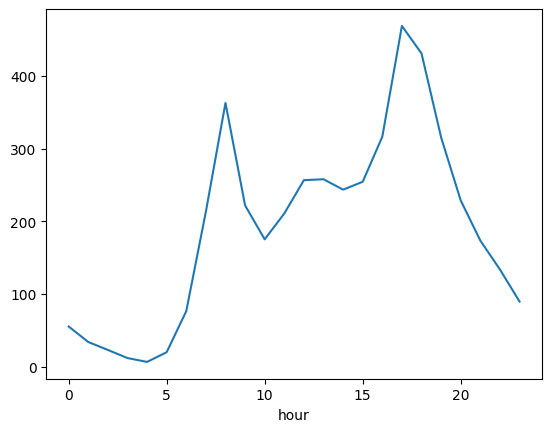

In [30]:
# Celda 2.1 - rentas promedio para cada valor de la variable "hour"
bikes.groupby('hour').total.mean().plot()

<Axes: xlabel='hour'>

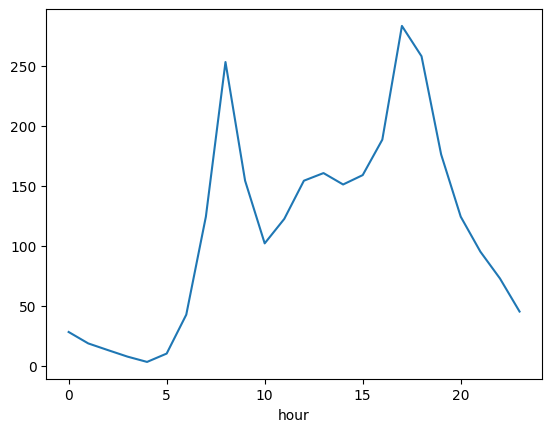

In [31]:
# Celda 2.2 - "season"=1 escriba su código y hallazgos 
bikes[bikes['season'] == 1].groupby('hour').total.mean().plot()

<Axes: xlabel='hour'>

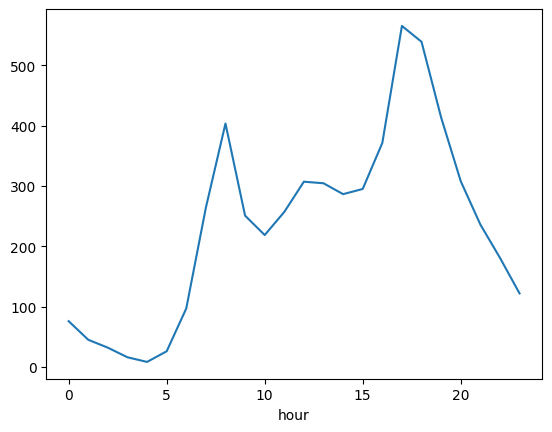

In [33]:
# Celda 2.3 - "season"=3 escriba su código y hallazgos 
bikes[bikes['season'] == 3].groupby('hour').total.mean().plot()

# Analisis graficos

Como se mencionó en el analisis descriptivo, cuando se observa la variable 'hour' existen 2 franjas de mayor flujo de alquiler de biciletas: una en la mañana y la otra en la tarde. Siendo la franja de la tarde la que tiene el mayor volúmen promedio. 

Adicionalmente, como se menciono en el analisis descriptivo de la variable 'season' en invierno en promedio hay una menor cantidad de alquileres en comparación con el verano. 

Los graficos de las celdas 2.2 y 2.3 reflejan estas conclusiones anteriores. En ambos graficas se ven las franjas de la mañana y tarde y los 3 momentos que se mencionaron anteriormente. También muestran la conclusión sobre las estaciones cuando se comparan los volumenes de alquileres promedio entre las 2 graficas. Es decir, la celda 2.2 que muestra la grafica en invierno tiene un rango menor del eje y que el que tiene la grafica de la celda 2.3.

### Punto 3 - Regresión lineal
En la celda 3 ajuste un modelo de regresión lineal a un conjunto de train de datos, utilizando "total" como variable de respuesta y "season" y "hour" como las únicas variables predictoras, teniendo en cuenta que la variable "season" es categórica. Luego, imprima los coeficientes e interprételos. ¿Cuáles son las limitaciones de la regresión lineal en este caso?

In [83]:
# Celda 3

bikes_seasons = bikes.copy()

bikes_seasons = pd.get_dummies(bikes, columns=['season'], drop_first=True)
bikes_seasons = bikes_seasons.astype({col: 'int' for col in bikes_seasons.select_dtypes('bool').columns})

lr = LinearRegression()
Mod_1 = lr.fit(bikes_seasons[['hour','season_2','season_3','season_4']], bikes_seasons['total'])

Mod_1.coef_

array([ 10.54520609, 100.31723192, 119.46754995,  84.08311787])

# Interpretación Coeficientes

El primer coeficiente de la regresión establece que por cada hora que pasa en el día, el alquiler aumenta en 10 bicicletas. El segundo coeficiente establece que cuando es primavera, el alquiler aumenta en 100 bicicletas en comparación con el promedio de bicicletas que hay en invierno. Con el tercer coeficiente se observa que cuando es verano, el alquiler aumenta en 100 bicicletas en comparación con el promedio de bicicletas que hay en invierno. Finalmente el ultimo coefficiente muestra que cuando la estación es otoño entonces se espera un aumento de 84 bicicletas en comparación con el promedio de bicicletas que hay en invierno.

La limitación de un modelo de regresión lineal es el manejo de variables categoricas ya que puede aumentar mucho el número de variables y caer en el problema de la dimensionalidad. Además, porque puede generar que se pierdan algunas relaciones que existen entre las categorias de una variable categorica. 

### Punto 4 - Árbol de decisión manual
En la celda 4 cree un árbol de decisiones para pronosticar la variable "total" iterando **manualmente** sobre las variables "hour" y  "season". El árbol debe tener al menos 6 nodos finales.

In [62]:
# Celda 4

# Selección de variables predictoras
feature_cols = ['hour','season']
feature_cols

# Separación de variables predictoras (X) y variable de interes (y)
X = bikes[feature_cols]
y = bikes['total']

# Definición de la función que calcula el gini index
def gini(y):
    if y.shape[0] == 0:
        return 0
    else:
        return 1 - (y.mean()**2 + (1 - y.mean())**2)

# Definición de la función gini_imputiry para calular la ganancia de una variable predictora j dado el punto de corte k
def gini_impurity(X_col, y, split):
    
    filter_l = X_col < split
    y_l = y.loc[filter_l]
    y_r = y.loc[~filter_l]
    
    n_l = y_l.shape[0]
    n_r = y_r.shape[0]
    
    gini_y = gini(y)
    gini_l = gini(y_l)
    gini_r = gini(y_r)
    
    gini_impurity_ = gini_y - (n_l / (n_l + n_r) * gini_l + n_r / (n_l + n_r) * gini_r)
    
    return gini_impurity_

# Definición de la función best_split para calcular cuál es la mejor variable y punto de cortepara hacer la bifurcación del árbol
def best_split(X, y, num_pct=10):
    
    features = range(X.shape[1])
    
    best_split = [0, 0, 0]  # j, split, gain
    
    # Para todas las varibles 
    for j in features:
        
        splits = np.percentile(X.iloc[:, j], np.arange(0, 100, 100.0 / (num_pct+1)).tolist())
        splits = np.unique(splits)[1:]
        
        # Para cada partición
        for split in splits:
            gain = gini_impurity(X.iloc[:, j], y, split)
                        
            if gain > best_split[2]:
                best_split = [j, split, gain]
    
    return best_split

# Definición de la función tree_grow para hacer un crecimiento recursivo del árbol
def tree_grow(X, y, level=0, min_gain=0.001, max_depth=None, num_pct=10):
    
    # Si solo es una observación
    if X.shape[0] == 1:
        tree = dict(y_pred=y.iloc[:1].values[0], y_prob=0.5, level=level, split=-1, n_samples=1, gain=0)
        return tree
    
    # Calcular la mejor división
    j, split, gain = best_split(X, y, num_pct)
    
    # Guardar el árbol y estimar la predicción
    y_pred = int(y.mean() >= 0.5) 
    y_prob = (y.sum() + 1.0) / (y.shape[0] + 2.0)  # Corrección Laplace 
    
    tree = dict(y_pred=y_pred, y_prob=y_prob, level=level, split=-1, n_samples=X.shape[0], gain=gain)
    # Revisar el criterio de parada 
    if gain < min_gain:
        return tree
    if max_depth is not None:
        if level >= max_depth:
            return tree   
    
    # Continuar creando la partición
    filter_l = X.iloc[:, j] < split
    X_l, y_l = X.loc[filter_l], y.loc[filter_l]
    X_r, y_r = X.loc[~filter_l], y.loc[~filter_l]
    tree['split'] = [j, split]

    # Siguiente iteración para cada partición
    
    tree['sl'] = tree_grow(X_l, y_l, level + 1, min_gain=min_gain, max_depth=max_depth, num_pct=num_pct)
    tree['sr'] = tree_grow(X_r, y_r, level + 1, min_gain=min_gain, max_depth=max_depth, num_pct=num_pct)
    
    return tree

tree = tree_grow(X, y, level=0, min_gain=0.001, max_depth=3, num_pct=10)
tree

{'y_pred': 1,
 'y_prob': 191.53903379867745,
 'level': 0,
 'split': [0, 8.0],
 'n_samples': 10886,
 'gain': 18268.811823533004,
 'sl': {'y_pred': 1,
  'y_prob': 55.40711902113459,
  'level': 1,
  'split': [0, 7.0],
  'n_samples': 3594,
  'gain': 7207.700659959655,
  'sl': {'y_pred': 1,
   'y_prob': 32.561604584527224,
   'level': 2,
   'split': [0, 6.0],
   'n_samples': 3139,
   'gain': 646.8008927589567,
   'sl': {'y_pred': 1,
    'y_prob': 25.15934475055845,
    'level': 3,
    'split': -1,
    'n_samples': 2684,
    'gain': 382.8088308604629},
   'sr': {'y_pred': 1,
    'y_prob': 75.92778993435448,
    'level': 3,
    'split': -1,
    'n_samples': 455,
    'gain': 743.095592335012}},
  'sr': {'y_pred': 1,
   'y_prob': 212.18599562363238,
   'level': 2,
   'split': [1, 2.0],
   'n_samples': 455,
   'gain': 5197.1071057533845,
   'sl': {'y_pred': 1,
    'y_prob': 122.27826086956522,
    'level': 3,
    'split': -1,
    'n_samples': 113,
    'gain': 0},
   'sr': {'y_pred': 1,
    'y_pr

### Punto 5 - Árbol de decisión con librería
En la celda 5 entrene un árbol de decisiones con la **librería sklearn**, usando las variables predictoras "season" y "hour" y calibre los parámetros que considere conveniente para obtener un mejor desempeño. Recuerde dividir los datos en conjuntos de entrenamiento y validación para esto. Comente el desempeño del modelo con alguna métrica de desempeño de modelos de regresión y compare desempeño con el modelo del punto 3.

El modelo con el mejor desempeño es: (0.6076047281533873, 8)


DecisionTreeRegressor(max_depth=8, random_state=1)

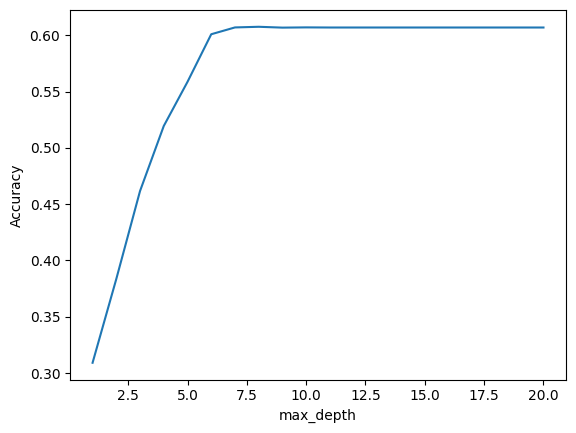

In [78]:
# Celda 5
# Lista de valores para calibrar el criterio de parada de máxima profundidad (max_depth)
max_depth_range = range(1, 21)

# Lista para guardar los valores del RMSE para cada valor de máxima profundidad (max_depth)
accuracy_scores = []

# Importación de modelos de sklearn 
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

XTrain, XTest, yTrain, yTest = train_test_split(X, y, test_size=0.3, random_state=0)

# Loop para obtener el desempeño del modelo de acuerdo con la máxima profundidad
for depth in max_depth_range:
    # Definición del árbol de decisión usando DecisionTreeClassifier de la libreria sklearn
    clf = DecisionTreeRegressor(max_depth=depth, random_state=1)
    accuracy_scores.append(cross_val_score(clf, XTrain, yTrain, cv=10).mean())

# Gráfica max_depth versus RMSE (error del modelo)
plt.plot(max_depth_range, accuracy_scores)
plt.xlabel('max_depth')
plt.ylabel('Accuracy')

# Mejor accuracy (desempeño del modelo) y su correspondiente max_depth
print(f'El modelo con el mejor desempeño es: {sorted(zip(accuracy_scores, max_depth_range))[::-1][0]}')

# max_depth=4 fue el mejor, se ajusta un árbol usando este valor 
clf = DecisionTreeRegressor(max_depth=8, random_state=1)
clf.fit(XTrain, yTrain)

In [86]:
from sklearn.metrics import mean_squared_error

bikes_seasons = bikes.copy()

XTest_seasons = pd.get_dummies(XTest, columns=['season'], drop_first=True)
XTest_seasons = XTest_seasons.astype({col: 'int' for col in XTest_seasons.select_dtypes('bool').columns})

yProb_lr = Mod_1.predict(XTest_seasons)

mse_lr = mean_squared_error(yTest, yProb_lr)
print("Error Cuadrático Medio en regresion lineal:", mse_lr)

yProb_tree = clf.predict(XTest)

mse_tree = mean_squared_error(yTest, yProb_tree)
print("Error Cuadrático Medio en arbol de decision:", mse_tree)

Error Cuadrático Medio en regresion lineal: 25324.1462279864
Error Cuadrático Medio en arbol de decision: 13275.45349461614


# Comparación de modelos

Para hacer la comparación de modelos se puede utilizar el Error Cuadrático Medio (mse por sus siglas en ingles). En donde el modelo que tenga un mse más bajo es el que tiene un mejor desempeño. En este caso, se calcula este indicador para una base de testeo, en el caso del modelo de regresión lineal primero se hace la transformación de la variable season a sus variables dummy para poder predecir con este modelo (Mod_1).

El modelo de regresión lineal tiene un mse de 25324.14 mientras que el arbol de decisión tiene un mse de 13275.45. Por lo tanto, es el arbol de decisión el que tiene un mejor desempeño entre los 2 modelos.

## Parte B - Métodos de ensamblajes
En esta parte del taller se usará el conjunto de datos de Popularidad de Noticias Online. El objetivo es predecir si la notica es popular o no, la popularidad está dada por la cantidad de reacciones en redes sociales. Para más detalles puede visitar el siguiente enlace: [datos](https://archive.ics.uci.edu/ml/datasets/online+news+popularity).

### Datos popularidad de noticias

In [87]:
# Lectura de la información de archivo .csv
df = pd.read_csv('mashable.csv', index_col=0)
df.head()

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,Popular
0,http://mashable.com/2014/12/10/cia-torture-rep...,28.0,9.0,188.0,0.732620,1.0,0.844262,5.0,1.0,1.0,...,0.200000,0.80,-0.487500,-0.60,-0.250000,0.9,0.8,0.4,0.8,1
1,http://mashable.com/2013/10/18/bitlock-kicksta...,447.0,7.0,297.0,0.653199,1.0,0.815789,9.0,4.0,1.0,...,0.160000,0.50,-0.135340,-0.40,-0.050000,0.1,-0.1,0.4,0.1,0
2,http://mashable.com/2013/07/24/google-glass-po...,533.0,11.0,181.0,0.660377,1.0,0.775701,4.0,3.0,1.0,...,0.136364,1.00,0.000000,0.00,0.000000,0.3,1.0,0.2,1.0,0
3,http://mashable.com/2013/11/21/these-are-the-m...,413.0,12.0,781.0,0.497409,1.0,0.677350,10.0,3.0,1.0,...,0.100000,1.00,-0.195701,-0.40,-0.071429,0.0,0.0,0.5,0.0,0
4,http://mashable.com/2014/02/11/parking-ticket-...,331.0,8.0,177.0,0.685714,1.0,0.830357,3.0,2.0,1.0,...,0.100000,0.55,-0.175000,-0.25,-0.100000,0.0,0.0,0.5,0.0,0


In [88]:
# Definición variable de interes y variables predictoras
X = df.drop(['url', 'Popular'], axis=1)
y = df['Popular']
y.mean()

0.5

In [89]:
# División de la muestra en set de entrenamiento y prueba
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

### Punto 6 - Árbol de decisión y regresión logística
En la celda 6 construya un árbol de decisión y una regresión logística. Para el árbol calibre al menos un parámetro y evalúe el desempeño de cada modelo usando las métricas de Accuracy y F1-Score.

El modelo con el mejor desempeño es: (0.6266666666666666, 2)


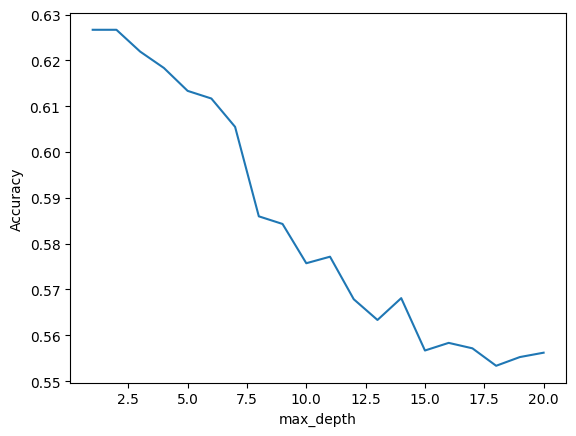

In [100]:
# Celda 6
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

# Lista de valores para calibrar el criterio de parada de máxima profundidad (max_depth)
max_depth_range = range(1, 21)

# Lista para guardar los valores del RMSE para cada valor de máxima profundidad (max_depth)
accuracy_scores = []

# Loop para obtener el desempeño del modelo de acuerdo con la máxima profundidad
for depth in max_depth_range:
    # Definición del árbol de decisión usando DecisionTreeClassifier de la libreria sklearn
    clf = DecisionTreeClassifier(max_depth=depth, random_state=1)
    accuracy_scores.append(cross_val_score(clf, XTrain, yTrain, cv=10).mean())

# Gráfica max_depth versus RMSE (error del modelo)
plt.plot(max_depth_range, accuracy_scores)
plt.xlabel('max_depth')
plt.ylabel('Accuracy')

# Mejor accuracy (desempeño del modelo) y su correspondiente max_depth
print(f'El modelo con el mejor desempeño es: {sorted(zip(accuracy_scores, max_depth_range))[::-1][0]}')

# max_depth=4 fue el mejor, se ajusta un árbol usando este valor 
clf = DecisionTreeClassifier(max_depth=2, random_state=1)
clf.fit(XTrain, yTrain)

# Modelo de regresión logistica
lr = LogisticRegression()
Mod_lr = lr.fit(XTrain, yTrain)

In [106]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def metricas_desempeño(XTest, yTest, modelo):

    nombre_modelo = str(modelo)
    predicciones=modelo.predict(XTest)
    #prediccionesProb=modelo.predict_proba(XTest)

    accuracy = accuracy_score(y_true=yTest, y_pred=predicciones)
    
    print(f'El valor de Accuracy para el modelo {nombre_modelo} es:')
    print(accuracy,"\n")
    print(f"{'.' * 90}","\n")

    # Calcular precisión
    precision = precision_score(y_true=yTest, y_pred=predicciones)
    print(f'El valor de Precisión para el modelo {nombre_modelo} es:')
    print(precision,"\n")
    print(f"{'.' * 90}","\n")
    
    # Calcular recall
    recall = recall_score(y_true=yTest, y_pred=predicciones)
    print(f'El valor de Recall para el modelo {nombre_modelo} es:')
    print(recall,"\n")
    print(f"{'.' * 90}","\n")
        
    # Calcular el F1-Score
    f1 = f1_score(y_true=yTest, y_pred=predicciones)
    print(f'El valor de F1-Score para el modelo {nombre_modelo} es:')
    print(f1,"\n")
    print(f"{'.' * 90}","\n")
            
metricas_desempeño(XTest, yTest, clf)
metricas_desempeño(XTest, yTest, Mod_lr)

El valor de Accuracy para el modelo DecisionTreeClassifier(max_depth=2, random_state=1) es:
0.6416666666666667 

.......................................................................................... 

El valor de Precisión para el modelo DecisionTreeClassifier(max_depth=2, random_state=1) es:
0.6423766816143498 

.......................................................................................... 

El valor de Recall para el modelo DecisionTreeClassifier(max_depth=2, random_state=1) es:
0.6373748609566184 

.......................................................................................... 

El valor de F1-Score para el modelo DecisionTreeClassifier(max_depth=2, random_state=1) es:
0.6398659966499163 

.......................................................................................... 

El valor de Accuracy para el modelo LogisticRegression() es:
0.6216666666666667 

.......................................................................................... 

El

# Analisis de comparación modelo regresión logistica y arbol de decisión

En general, el modelo arbol de decisión tiene un mejor desempeño en las metricas de accuracy y F1-Score (0.64 y 0.63 respectivamente) contra lo que se observa que sucede con el modelo de regresión logistica (0.62 y 0.61). Sin embargo, es importante señalar que la diferencia no es muy grande.

### Punto 7 - Votación Mayoritaria
En la celda 7 elabore un esamble con la metodología de **Votación mayoritaria** compuesto por 300 muestras bagged donde:

-las primeras 100 muestras vienen de árboles de decisión donde max_depth tome un valor de su elección\
-las segundas 100 muestras vienen de árboles de decisión donde min_samples_leaf tome un valor de su elección\
-las últimas 100 muestras vienen de regresiones logísticas

Evalúe cada uno de los tres modelos de manera independiente utilizando las métricas de Accuracy y F1-Score, luego evalúe el ensamble de modelos y compare los resultados. 

Nota: 

Para este ensamble de 300 modelos, deben hacer votación mayoritaria. Esto lo pueden hacer de distintas maneras. La más "fácil" es haciendo la votación "manualmente", como se hace a partir del minuto 5:45 del video de Ejemplo práctico de emsablajes en Coursera. Digo que es la más fácil porque si hacen la votación mayoritaria sobre las 300 predicciones van a obtener lo que se espera.

Otra opción es: para cada uno de los 3 tipos de modelos, entrenar un ensamble de 100 modelos cada uno. Predecir para cada uno de esos tres ensambles y luego predecir como un ensamble de los 3 ensambles. La cuestión es que la votación mayoritaria al usar los 3 ensambles no necesariamente va a generar el mismo resultado que si hacen la votación mayoritaria directamente sobre los 300 modelos. Entonces, para los que quieran hacer esto, deben hacer ese último cálculo con cuidado.

Para los que quieran hacerlo como ensamble de ensambles, digo que se debe hacer el ensamble final con cuidado por lo siguiente. Supongamos que:

* para los 100 árboles del primer tipo, la votación mayoritaria es: 55% de los modelos predicen que la clase de una observación es "1"
* para los 100 árboles del segundo tipo, la votación mayoritaria es: 55% de los modelos predicen que la clase de una observación es "1"
* para las 100 regresiones logísticas, la votación mayoritaria es: 10% de los modelos predicen que la clase de una observación es "1"

Si se hace la votación mayoritaria de los 300 modelos, la predicción de esa observación debería ser: (100*55%+100*55%+100*10%)/300 = 40% de los modelos votan porque la predicción debería ser "1". Es decir, la predicción del ensamble es "0" (dado que menos del 50% de modelos predijo un 1).

Sin embargo, si miramos cada ensamble por separado, el primer ensamble predice "1", el segundo ensamble predice "1" y el último ensamble predice "0". Si hago votación mayoritaria sobre esto, la predicción va a ser "1", lo cual es distinto a si se hace la votación mayoritaria sobre los 300 modelos.

In [138]:
# Celda 7
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

# Creación de 100 muestras de bootstrap
n_estimators = 100
np.random.seed(123)

n_samples = XTrain.shape[0]
samples = [np.random.choice(a=n_samples, size=n_samples, replace=True) for _ in range(n_estimators)]

# Entrenamiento primeras 100 muestras con árboles de decisión donde max_depth es especificado

np.random.seed(123) 
seeds = np.random.randint(1, 10000, size=n_estimators)

trees_1 = {}
for i in range(n_estimators):
    trees_1[i] = DecisionTreeClassifier(max_features="sqrt", max_depth=2, random_state=seeds[i])
    trees_1[i].fit(XTrain.iloc[samples[i]], yTrain.iloc[samples[i]])

# Predicción para los datos del set de test con cada modelo
y_pred_m1 = pd.DataFrame(index=XTest.index, columns=list(range(n_estimators)))
for i in range(n_estimators):
    y_pred_m1.iloc[:, i] = trees_1[i].predict(XTest)

# Votación mayoritaria
y_pred = (y_pred_m1.sum(axis=1) >= (n_estimators / 2)).astype(np.int64)

# Desempeño al hacer votación mayoritaria

print(f'El valor de F1-Score para las primeras 100 muestras es:')
print(metrics.f1_score(y_pred, yTest),"\n")
print(f"{'.' * 90}","\n")

print(f'El valor de Accuracy para las primeras 100 muestras es:')
print(metrics.accuracy_score(y_true=yTest, y_pred=y_pred),"\n")
print(f"{'.' * 90}","\n")

# Entrenamiento segundas 100 muestras con árboles de decisión donde min_samples_leaf es especificado

trees_2 = {}
for i in range(n_estimators):
    trees_2[i] = DecisionTreeClassifier(max_features="sqrt", min_samples_leaf=100, random_state=seeds[i])
    trees_2[i].fit(XTrain.iloc[samples[i]], yTrain.iloc[samples[i]])

# Predicción para los datos del set de test con cada modelo
y_pred_m2 = pd.DataFrame(index=XTest.index, columns=list(range(n_estimators)))
for i in range(n_estimators):
    y_pred_m2.iloc[:, i] = trees_2[i].predict(XTest)

# Votación mayoritaria
y_pred = (y_pred_m2.sum(axis=1) >= (n_estimators / 2)).astype(np.int64)

print(f'El valor de F1-Score para las segundas 100 muestras es:')
print(metrics.f1_score(y_pred, yTest),"\n")
print(f"{'.' * 90}","\n")

print(f'El valor de Accuracy para las segundas 100 muestras es:')
print(metrics.accuracy_score(y_true=yTest, y_pred=y_pred),"\n")
print(f"{'.' * 90}","\n")

# Entrenamiento terceras 100 muestras utilizando modelos de regresión lineal

lr = {}

for i in range(n_estimators):
    lr[i] = LogisticRegression()
    lr[i].fit(XTrain.iloc[samples[i]], yTrain.iloc[samples[i]])

# Predicción para los datos del set de test con cada modelo
y_pred_m3 = pd.DataFrame(index=XTest.index, columns=list(range(n_estimators)))
for i in range(n_estimators):
    y_pred_m3.iloc[:, i] = lr[i].predict(XTest)

# Votación mayoritaria
y_pred = (y_pred_m3.sum(axis=1) >= (n_estimators / 2)).astype(np.int64)

print(f'El valor de F1-Score para las terceras 100 muestras es:')
print(metrics.f1_score(y_pred, yTest),"\n")
print(f"{'.' * 90}","\n")

print(f'El valor de Accuracy para las terceras 100 muestras es:')
print(metrics.accuracy_score(y_true=yTest, y_pred=y_pred),"\n")
print(f"{'.' * 90}","\n")

El valor de F1-Score para las primeras 100 muestras es:
0.638250140213124 

.......................................................................................... 

El valor de Accuracy para las primeras 100 muestras es:
0.6416666666666667 

.......................................................................................... 

El valor de F1-Score para las segundas 100 muestras es:
0.6582556226001097 

.......................................................................................... 

El valor de Accuracy para las segundas 100 muestras es:
0.6538888888888889 

.......................................................................................... 

El valor de F1-Score para las terceras 100 muestras es:
0.6218020022246941 

.......................................................................................... 

El valor de Accuracy para las terceras 100 muestras es:
0.6222222222222222 

..........................................................................

In [139]:
y_pred_final = pd.concat([y_pred_m2, y_pred_m1], axis=1)
y_pred_final = pd.concat([y_pred_final, y_pred_m2], axis=1)

# Votación mayoritaria
y_pred = (y_pred_final.sum(axis=1) >= (y_pred_final.shape[1] / 2)).astype(np.int64)

print(f'El valor de F1-Score para las terceras 100 muestras es:')
print(metrics.f1_score(y_pred, yTest),"\n")
print(f"{'.' * 90}","\n")

print(f'El valor de Accuracy para las terceras 100 muestras es:')
print(metrics.accuracy_score(y_true=yTest, y_pred=y_pred),"\n")
print(f"{'.' * 90}","\n")

El valor de F1-Score para las terceras 100 muestras es:
0.6533110740122426 

.......................................................................................... 

El valor de Accuracy para las terceras 100 muestras es:
0.6538888888888889 

.......................................................................................... 



# Analisis Ensamblaje con votacion mayoritaria

Cuando se evaluan los modelos con los indicadores de Accuracy y F1-Score, todos dan por debajo que lo que da cuando se evaluan estos mismos indicadores sobre el ensamblaje de modelos. Particularmente, el ensamblaje da mucho mejor que los modelos de regresión lineal y solo un poco mejor que los arboles de decisión donde se especificaron los parametros max_depth o min_samples_leaf.

### Punto 8 - Votación Ponderada
En la celda 8 elabore un ensamble con la metodología de **Votación ponderada** compuesto por 300 muestras bagged para los mismos tres escenarios del punto 7. Evalúe los modelos utilizando las métricas de Accuracy y F1-Score

In [142]:
# Celda 8

samples_oob = []
# Obtención de las observaciones fuera de la bolsa "out-of-bag" para cada muestra
for sample in samples:
    samples_oob.append(sorted(set(range(n_samples)) - set(sample)))

# Estimación de los errores OOB para cada clasificador
errors = np.zeros(n_estimators)

# Ponderación primeras 100 muestras con árboles de decisión donde max_depth es especificado

for i in range(n_estimators):
    y_pred_ = trees_1[i].predict(XTrain.iloc[samples_oob[i]])
    errors[i] = 1 - metrics.accuracy_score(yTrain.iloc[samples_oob[i]], y_pred_)

# Obtención de los pesos alpha de cada modelo de acuerdo al error OOB
alpha = (1 - errors) / (1 - errors).sum()

# Ponderación de las predicciones con los pesos alpha
weighted_sum_1 = ((y_pred_m1) * alpha).sum(axis=1)
weighted_sum_1.head(20)

# Desempeño al hacer votación ponderada
y_pred = (weighted_sum_1 >= 0.5).astype(np.int64)

print(f'El valor de F1-Score para las primeras 100 muestras es:')
print(metrics.f1_score(y_pred, yTest),"\n")
print(f"{'.' * 90}","\n")

print(f'El valor de Accuracy para las primeras 100 muestras es:')
print(metrics.accuracy_score(y_true=yTest, y_pred=y_pred),"\n")
print(f"{'.' * 90}","\n")

# Ponderación segundas 100 muestras con árboles de decisión donde min_samples_leaf es especificado

for i in range(n_estimators):
    y_pred_ = trees_2[i].predict(XTrain.iloc[samples_oob[i]])
    errors[i] = 1 - metrics.accuracy_score(yTrain.iloc[samples_oob[i]], y_pred_)

# Obtención de los pesos alpha de cada modelo de acuerdo al error OOB
alpha = (1 - errors) / (1 - errors).sum()

# Ponderación de las predicciones con los pesos alpha
weighted_sum_2 = ((y_pred_m2) * alpha).sum(axis=1)
weighted_sum_2.head(20)

# Desempeño al hacer votación ponderada
y_pred = (weighted_sum_2 >= 0.5).astype(np.int64)

print(f'El valor de F1-Score para las segundas 100 muestras es:')
print(metrics.f1_score(y_pred, yTest),"\n")
print(f"{'.' * 90}","\n")

print(f'El valor de Accuracy para las segundas 100 muestras es:')
print(metrics.accuracy_score(y_true=yTest, y_pred=y_pred),"\n")
print(f"{'.' * 90}","\n")

# Ponderación terceras 100 muestras utilizando modelos de regresión lineal

for i in range(n_estimators):
    y_pred_ = lr[i].predict(XTrain.iloc[samples_oob[i]])
    errors[i] = 1 - metrics.accuracy_score(yTrain.iloc[samples_oob[i]], y_pred_)

# Obtención de los pesos alpha de cada modelo de acuerdo al error OOB
alpha = (1 - errors) / (1 - errors).sum()

# Ponderación de las predicciones con los pesos alpha
weighted_sum_3 = ((y_pred_m3) * alpha).sum(axis=1)
weighted_sum_3.head(20)

# Desempeño al hacer votación ponderada
y_pred = (weighted_sum_3 >= 0.5).astype(np.int64)

print(f'El valor de F1-Score para las terceras 100 muestras es:')
print(metrics.f1_score(y_pred, yTest),"\n")
print(f"{'.' * 90}","\n")

print(f'El valor de Accuracy para las terceras 100 muestras es:')
print(metrics.accuracy_score(y_true=yTest, y_pred=y_pred),"\n")
print(f"{'.' * 90}","\n")

El valor de F1-Score para las primeras 100 muestras es:
0.638250140213124 

.......................................................................................... 

El valor de Accuracy para las primeras 100 muestras es:
0.6416666666666667 

.......................................................................................... 

El valor de F1-Score para las segundas 100 muestras es:
0.6552863436123348 

.......................................................................................... 

El valor de Accuracy para las segundas 100 muestras es:
0.6522222222222223 

.......................................................................................... 

El valor de F1-Score para las segundas 100 muestras es:
0.6202672605790646 

.......................................................................................... 

El valor de Accuracy para las segundas 100 muestras es:
0.6211111111111111 

..........................................................................

In [151]:
weighted_sum_final = pd.concat([weighted_sum_1, weighted_sum_2], axis=1)
weighted_sum_final = pd.concat([weighted_sum_final, weighted_sum_3], axis=1)

# Votación mayoritaria
y_pred = (weighted_sum_final.sum(axis=1) / 3 >= 0.5).astype(np.int64)

print(f'El valor de F1-Score para las terceras 100 muestras es:')
print(metrics.f1_score(y_pred, yTest),"\n")
print(f"{'.' * 90}","\n")

print(f'El valor de Accuracy para las terceras 100 muestras es:')
print(metrics.accuracy_score(y_true=yTest, y_pred=y_pred),"\n")
print(f"{'.' * 90}","\n")

El valor de F1-Score para las terceras 100 muestras es:
0.6404494382022472 

.......................................................................................... 

El valor de Accuracy para las terceras 100 muestras es:
0.6444444444444445 

.......................................................................................... 



### Punto 9 - Comparación y análisis de resultados
En la celda 9 comente sobre los resultados obtenidos con las metodologías usadas en los puntos 7 y 8, compare los resultados y enuncie posibles ventajas o desventajas de cada una de ellas.

# Celda 9

## Comparación y análisis de resultados

Cuando se hacen modelos de ensamblaje por votación mayoritaria o ponderada se pueden encontrar algunas diferencias en los indicadores de Accuracy y F1-Score. En este caso, cuando se hizo votación mayoritaria (Accuracy = 0.65 y F1-Score = 0.65) estos estuvieron levemente mejores que cuando se hace por ponderada (Accuracy = 0.64 y F1-Score = 0.64).

Una de las desventajas que tiene la votacion mayoritaria es que da a todos los modelos el mismo peso en la votación, mientras que la ponderada (la cual es una ventaja de esta metodología) ayuda a que lo anterior se equilibre por medio de los pesos alpha de cada modelo de acuerdo al error OOB. Una de las ventajas que tiene este tipo de votación es que no agrega un paso adicional en el calculo de las votaciones lo que ayuda a que los resultados puedan ser más robustos.